In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# **Fractals: The Mathematical Beauty of Infinite Coplexity**
---
To quote James Gleick: "In the mind's eye, a fractal is a way of seeing infinity".

In this notebook we are going to explore the concept, explain it mathematically and visualise it trough Python code.

## **1. What are fractals?**
A fractal is a never-ending pattern. Fractals are infinitely complex patterns that are self-similar across different scales. They are created by repeating a simple process over and over in an ongoing feedback loop. Driven by recursion, fractals are images of dynamic systems – the pictures of Chaos. Geometrically, they exist in between our familiar dimensions.

Many fractals appear similar at various scales. This exhibition of similar patterns at increasingly smaller scales is called self-similarity, also known as expanding symmetry or unfolding symmetry; if this replication is exactly the same at every scale, the shape is called affine self-similar. Fractal geometry lies within the mathematical branch of measure theory.

### **a) How are they different from the finite geometric figures we know?**
Fractals differ from finite geometric figures in that they exhibit infinite complexity and self-similarity at every scale, whereas finite geometric figures have a limited structure and well-defined dimensions. Traditional shapes like squares, triangles, or circles have fixed perimeters and areas that remain constant under magnification. In contrast, fractals—such as the Mandelbrot set or the Koch snowflake—reveal new detail no matter how much you zoom in, and often have non-integer (fractal) dimensions. This means their perimeter or surface area can be infinite while still enclosing a finite space, defying conventional geometric intuition. Fractals also often arise from iterative processes, making them deeply connected to recursive mathematical rules and natural patterns.

### **b) Self-Similarity**  

Simply put, a fractal is a geometric object that is similar to itself on all scales. If you zoom in on a fractal object it will look similar or exactly like the original shape. This property is called **self-similarity**.
 
A formal mathematical definition states that a set \( S \) is self-similar if:  
$$
S = \bigcup_{i=1}^{N} r_i S + d_i
$$ 
Here:  
- ( $r_i$ ): Scaling factor for each copy  
- ($ d_i $): Translation vector
- ($ N $): Number of smaller copies

### **c) Fractal Dimension**  
A useful metric defined on a fractal is the measure on how the detail in the fractal changes with scale, known as its fractal dimension, D. Another view is, when projected onto a grid, how many elements the fractal covers as the number of elements increases. 
The fractal dimension does not need be an integer.

The **Hausdorff dimension** quantifies how a fractal scales differently from typical geometric shapes.  
For self-similar fractals, it can be calculated as:  
$$
D = \frac{\log(N)}{\log(\frac{1}{r})}
$$ 
Where:  
- ($ N $): Number of self-similar pieces  
- ($ r $): Scaling factor of each piece  

### **Example: Koch Snowflake Dimension:**
The Koch snowflake consists of four scaled-down copies of itself, each scaled by a factor of $ \frac{1}{3} $.  
$$
D = \frac{\log(4)}{\log(3)} \approx 1.2619
$$  
This means the Koch curve has a non-integer dimension, reflecting its complex structure.  

## **2. Fractal Geometry**
### **a) A little bit of history**
For thousands of years, the smooth and regular shapes of classical geometry — lines and planes, triangles and cones, circles and spheres — have helped humans measure and understand the world around them. But when it comes to describing the complexity of nature, these smooth constructions often turn out to be the wrong kind of abstraction. Nature is rough and irregular, and until recently this irregularity was impossible to measure. That changed, thanks to the work of **Benoît Mandelbrot**, a maverick mathematician and research scientist. He noted that clouds are not perfect spheres, mountains are not symmetric cones, and lightning doesn’t travel in a straight line.

**Mandelbrot**, who spent 35 years at IBM, pioneered the discovery of the principles that would later form an entirely new field — **fractal geometry**. He coined the term “fractal” to refer to a new class of mathematical shapes whose uneven contours mimicked the irregularities found in nature.

### **b) Principles of Fractal Geometry**
Fractal geometry is a mathematical framework that studies structures characterized by self-similarity, infinite complexity, and fractional dimensions. Unlike classical geometry, which relies on smooth, regular shapes describable in integer dimensions, fractal geometry employs recursive and iterative processes to define sets whose detailed structure persists at every scale. These structures often require non-integer dimensions to capture their scaling behavior, a concept formalized through metrics such as the Hausdorff or box-counting dimension. Fractal geometry also involves analyzing how geometric measures—like length, area, or volume—behave under successive magnification, often leading to divergence in classical terms. It utilizes advanced mathematical tools from topology, metric spaces, and complex dynamics to rigorously define and analyze objects that exhibit irregularity and fragmentation, making it essential for modeling phenomena that lie beyond the scope of traditional Euclidean analysis.

The principles of fractal geometry are rooted in mathematical ideas that extend beyond traditional Euclidean geometry. Here are the core principles:

#### **1.	Self-Similarity:** 
Fractals exhibit self-similarity, meaning their structure is invariant under scaling. A portion of the fractal looks similar to the whole, either exactly (in deterministic fractals) or statistically (in stochastic fractals).

#### **2.	Fractional Dimension:** 
Fractals are defined not by whole-number dimensions but by fractal dimensions, which quantify their complexity. Unlike lines (dimension 1) or planes (dimension 2), a fractal can have a dimension like 1.58, revealing how it fills space in a non-integer way.

#### **3.	Recursive Generation:** 
Many fractals are generated through iterative or recursive mathematical processes, where a simple rule is repeatedly applied. This recursive nature is key to the emergence of their intricate structures.

#### **4.	Infinite Detail:** 
Fractals contain detail at every scale. No matter how much one zooms in, the structure reveals more complexity, and in many cases, this process can continue indefinitely in theory.

#### **5.	Non-differentiability:** 
Unlike smooth curves in classical geometry, fractals are often nowhere differentiable. This means they cannot be described by a single tangent at any point, reflecting their jagged, irregular nature.

#### **6.	Scale Invariance:** 
In fractal geometry, the laws that define the structure remain consistent across different magnitudes of scale. This property makes fractals ideal for modeling natural phenomena that do not conform to a single scale.



## **3. Fractal sets: Mathematical and Python explanation**
Now we know what fractals and fractal geometry are. We have an understanding of the principles and the properties. Let's proceed with examples with detailed mathematical and Python analysis.

Let's start with one of the most popular ones and built our way up from there.
### **a) Mandelbrot Set** 

The Mandelbrot set is a two-dimensional set that is defined in the coplex plane as the complex numbers $ c $ for which the function 
$$ f_{c}(z)=z^{2}+c $$
does not diverge to infinity when iterated starting at $ z = 0 $ , i.e., for which the sequence $ f_{c}(f_{c}(0)) $ , etc., remains bounded in absolute value.

Images of the Mandelbrot set exhibit an infinitely complicated boundary that reveals progressively ever-finer recursive detail at increasing magnifications; mathematically, the boundary of the Mandelbrot set is a fractal curve. The "style" of this recursive detail depends on the region of the set boundary being examined.

#### **1. Python implementation**


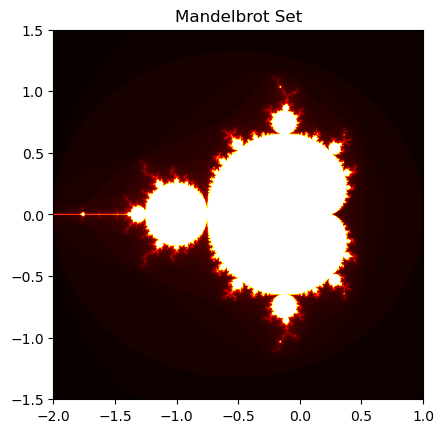

In [17]:
def mandelbrot(c, max_num):
    z = 0
    for n in range(max_num):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_num

width, height, max_num = 800, 800, 100
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

image = np.zeros((height, width))
for x in range(width):
    for y in range(height):
        real = x_min + (x / width) * (x_max - x_min)
        imag = y_min + (y / height) * (y_max - y_min)
        color = mandelbrot(complex(real, imag), max_num)
        image[y, x] = color

plt.imshow(image, cmap='hot', extent=(x_min, x_max, y_min, y_max))
plt.title('Mandelbrot Set')
plt.show()

As a consequence of the definition of the Mandelbrot set, there is a close correspondence between the geometry of the Mandelbrot set at a given point and the structure of the corresponding Julia set. For instance, a value of c belongs to the Mandelbrot set if and only if the corresponding Julia set is connected.
This duality allows the Mandelbrot set to act as a map of Julia sets. It tells us about the stability of complex dynamics. Inside the Mandelbrot set, points tend to form stable orbits. Outside, they diverge.

The boundary of the Mandelbrot set is infinitely detailed and believed to be locally connected everywhere—a profound open problem in mathematics. Its study intersects with topology, chaos theory, and even computability theory, where the set's visual beauty masks incredibly deep structures.


### **b) Julia Set**  

In the previous section we showed how the Mandelbrot set can be generated using the expression:
$$
𝑧_{𝑛+1}=z_n^2+𝑧_0
$$
This is a particular case of the quadratic recurrence equation:
$$
z_{n+1} = z_n^2 + c
$$
with  $ 𝑐 $ a fixed complex number. The set we obtain with this equation is known as the Julia set. In fact, there is a different Julia set for almost every  $ 𝑐 $.
Similarly as we did for the Mandelbrot set, we obtain a sequence of complex numbers  $ 𝑧_𝑛 $ with  $ 𝑛=0,1,2,… $.   Again, the points  $ 𝑧_𝑛 $ are said to form the orbit of  $ 𝑧_0 $, and the Julia set is defined as follows:
If the orbit  $ 𝑧_𝑛 $ fails to escape to infinity, the initial $ 𝑧_0 $ is said to belong to the filled-in Julia Set.

#### **1. Python Implementation**

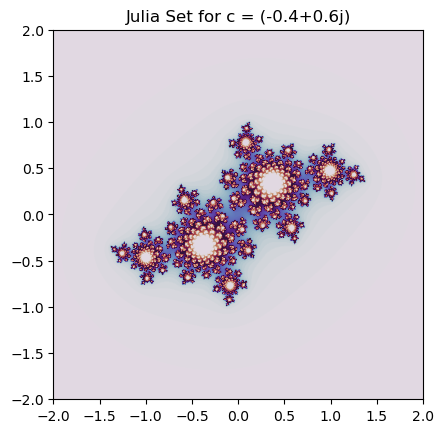

In [18]:
def julia(c, max_iter=100):
    x = np.linspace(-2, 2, 800)
    y = np.linspace(-2, 2, 800)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    output = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 10
        Z[mask] = Z[mask] ** 2 + c
        output[mask] = i

    plt.imshow(output, cmap='twilight', extent=(-2, 2, -2, 2))
    plt.title(f'Julia Set for c = {c}')
    plt.show()

julia(complex(-0.4, 0.6))

Now, let's look at one of the easiest fractals to construct and understand. 

### **c) Sierpinski Triangle**
The Sierpiński triangle, also called the Sierpiński gasket or Sierpiński sieve, is a fractal with the overall shape of an equilateral triangle, subdivided recursively into smaller equilateral triangles. Originally constructed as a curve, this is one of the basic examples of self-similar sets. It is a mathematically generated pattern reproducible at any magnification or reduction.
The Sierpinski Triangle is a self-similar fractal created by recursively removing the central triangle from a larger triangle.

The number of black triangles at iteration ($ n $) is:
$$
T_n = 3^n
$$

The **fractal dimension** is:
$$
D = \frac{\log(3)}{\log(2)} \approx 1.5849
$$

Interestingly, the Sierpinski triangle pattern also appears after shading the odd numbers in Pascal’s Triangle!
#### **1. Constuction**
![The image is unavailable](Sierpinski_triangle_evolution.svg)

#### **2. Python Implementation**

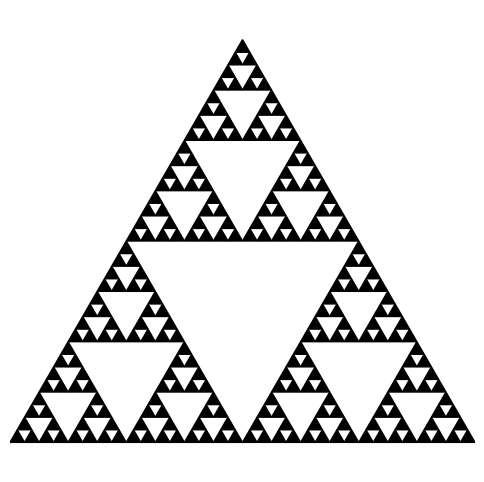

In [19]:
def draw_triangle(points, color='black'):
    triangle = plt.Polygon(points, edgecolor='black', facecolor=color)
    plt.gca().add_patch(triangle)

def sierpinski(points, depth):
    if depth == 0:
        draw_triangle(points)
    else:
        mid01 = (points[0] + points[1]) / 2
        mid12 = (points[1] + points[2]) / 2
        mid20 = (points[2] + points[0]) / 2

        sierpinski([points[0], mid01, mid20], depth - 1)
        sierpinski([mid01, points[1], mid12], depth - 1)
        sierpinski([mid20, mid12, points[2]], depth - 1)

p1 = np.array([0, 0])
p2 = np.array([1, 0])
p3 = np.array([0.5, np.sqrt(3) / 2])
triangle_points = [p1, p2, p3]

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.axis('off')
plt.xlim(0, 1)
plt.ylim(0, np.sqrt(3)/2)
sierpinski(triangle_points, depth=5)
plt.show()

### **d) The Koch Snowflake**
The Koch snowflake (also known as the Koch curve) is a fractal curve and one of the earliest fractals to have been described.

#### **1. Construction**
The Koch snowflake can be built up iteratively, in a sequence of stages. The first stage is an equilateral triangle, and each successive stage is formed by adding outward bends to each side of the previous stage, making smaller equilateral triangles. The areas enclosed by the successive stages in the construction of the snowflake converge to $\frac{8}{5}$ times the area of the original triangle, while the perimeters of the successive stages increase without bound. Consequently, the snowflake encloses a finite area, but has an infinite perimeter.

![The image is unavailable](KochFlake.svg)

#### **2. Infinite Perimeter, Finite Area: The Koch Snowflake Paradox**
The Koch Snowflake reveals one of the most elegant paradoxes in mathematics: how a shape can have an infinite perimeter yet enclose a finite area. Starting from an equilateral triangle, each iteration replaces the middle third of every line segment with a "bump"—a new equilateral triangle protruding outward.

Let the initial side length be $L$. At iteration $n$:

Number of sides: $N_n = 3 \cdot 4^n$

Length of each side: $L_n = \frac{L}{3^n}$

Perimeter: $P_n = N_n \cdot L_n = 3 \cdot 4^n \cdot \frac{L}{3^n} = 3L \left( \frac{4}{3} \right)^n$

As $ n \to \infty $,  $P_n \to \infty$ . Yet, the added area forms a converging geometric series. This violates our Euclidean expectation that finite shapes must have finite boundaries. Instead, it reflects the fractal truth: measurement depends on scale. The more you zoom in, the more detail you find—and the longer the boundary appears to be.

This paradox has real-world implications. Coastlines exhibit similar properties: measured with smaller rulers, their lengths increase indefinitely. This is known as the **coastline paradox**, and it arises directly from fractal behavior.

## **4. Applications**
### **a) Fractals and fractal dimensions in practice**
While we have already seen fractals described as having fractional dimensions, what does this mean practically? In classical geometry, dimensions are integers: 1D for lines, 2D for squares, and so on. But fractals live in between. The Sierpinski triangle, for example, has a dimension of $\frac{\log(3)}{\log(2)} \approx 1.5849$ —meaning it is more than a line but less than a filled plane.

In applied mathematics, box-counting dimension is used to approximate the dimension of complex sets:
$$D = \lim_{\varepsilon \to 0} \frac{\log N(\varepsilon)}{\log(1/\varepsilon)}$$
Here, $N(\varepsilon)$ is the number of boxes of side $\varepsilon$ required to cover the fractal. In practice, this is plotted as a log-log graph. A straight line indicates a power-law relationship, and the slope gives the dimension.

Fractional dimensions are critical in:

- Texture analysis in digital imaging

- Lung surface modeling in biology

- Urban growth simulations in geography

These applications rely on the fact that real-world complexity is not neatly integer-dimensional. Fractals offer a rigorous way to quantify that.

### **b) Fractals in nature**




Approximate fractals found in nature display self-similarity over extended, but finite, scale ranges. The connection between fractals and leaves, for instance, is currently being used to determine how much carbon is contained in trees. Phenomena known to have fractal features include:

- Actin cytoskeleton
- Algae
- Animal coloration patterns
- Blood vessels and pulmonary vessels
- Brownian motion (generated by a one-dimensional Wiener process).
- Clouds and rainfall areas
- Coastlines
- Craters
- Crystals
- DNA
- Dust grains
- Earthquakes
- Fault lines
- Geometrical optics
- Heart rates
- Heart sounds
- Lake shorelines and areas
- Lightning bolts
- Mountain-goat horns
- Neurons
- Polymers
- Percolation
- Mountain ranges
- Ocean waves
- Pineapple
- Proteins
- Psychedelic Experience
- Purkinje cells
- Rings of Saturn
- River networks
- Romanesco broccoli
- Snowflakes
- Soil pores
- Surfaces in turbulent flows
- Trees

## **5. Denev Median Fractal - my own creation**
This fractal begins with an equilateral triangle. At each recursive step, all 3 medians are drawn, dividing the triangle into 6 smaller triangles. The process is then repeated recursively on each of these sub-triangles.
### **a) Recursive Definition**

Let $\Delta ABC$ be an equilateral triangle.

Define the fractal $\mathcal{T}_n$ recursively:

1. Base case $(n = 0)$: 
- Draw the triangle $\Delta ABC$.
2. Step $(n ≥ 1)$:
- Draw the medians: segments connecting each vertex to the midpoint of the opposite side.
- This divides the triangle into 6 sub-triangles, all sharing a common centroid.
- Apply $\mathcal{T}_{n-1}$ recursively to each of the 6 sub-triangles.

Letting $n \to \infty$, the limiting set $\mathcal{T}_\infty$ forms a continuous, self-similar triangular fractal.

### **b) Fractal Properties**

- Symmetry: Rotational symmetry of order 3
- Self-similarity: Deterministic, exact
- Growth: At each step, number of triangles = $6^n$
- Fractal dimension: Estimated via box-counting (can be approximated numerically)
- Applications: Pure math, generative art, tessellations, recursive mesh refinement


### **c) Visual:**

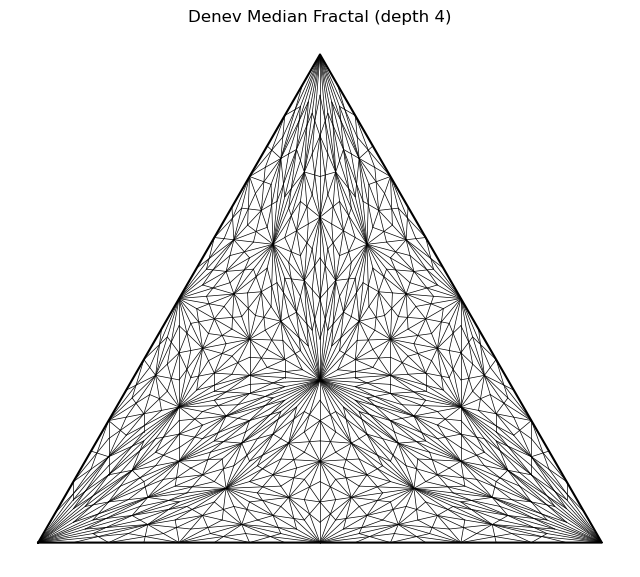

In [76]:
def draw_triangle(ax, pts, depth):
    if depth == 0:
        return

    A, B, C = pts
    AB = (A + B) / 2
    BC = (B + C) / 2
    CA = (C + A) / 2
    centroid = (A + B + C) / 3

    ax.plot([A[0], BC[0]], [A[1], BC[1]], color='black', linewidth=0.5)
    ax.plot([B[0], CA[0]], [B[1], CA[1]], color='black', linewidth=0.5)
    ax.plot([C[0], AB[0]], [C[1], AB[1]], color='black', linewidth=0.5)

    sub_triangles = [
        [A, AB, centroid],
        [AB, B, centroid],
        [B, BC, centroid],
        [BC, C, centroid],
        [C, CA, centroid],
        [CA, A, centroid]
    ]

    for tri in sub_triangles:
        draw_triangle(ax, np.array(tri), depth - 1)

def run_triangle_median_fractal(depth=4):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.axis('off')

    A = np.array([0, 0])
    B = np.array([1, 0])
    C = np.array([0.5, np.sqrt(3)/2])
    triangle = np.array([A, B, C, A])

    ax.plot(triangle[:, 0], triangle[:, 1], color='black')

    draw_triangle(ax, np.array([A, B, C]), depth)

    plt.title(f'Denev Median Fractal (depth {depth})')
    plt.show()
run_triangle_median_fractal(depth=4)

Here is a visualisation of the changes in the pattern as the process is repeated.

In [77]:
from IPython.display import HTML

HTML("""
<video width="600" controls>
  <source src="denev_median_fractal_depth6.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")

#### This fractal is newly defined and does not appear in any known catalogs. Therefore, it may be considered a novel geometric construction. I refer to it as the Denev Median Fractal, in recognition of its recursive median-based structure within an equilateral triangle, leading to a distinct self-similar triangular pattern not previously documented in the literature.


## **Overview**
In this notebook we explored the fascinating world of Fractals and Fractal Geometry. We explained the mathemtical structure and provided visualisations trough Python code. We examined fractal properties and applications and gave examples. A new fractal set was introduced and explored in detail.

"Mathematics, rightly viewed, possesses not only truth, but supreme beauty"
\- Bertrant Russell



## **Resources**
- https://www.slideshare.net/slideshow/fractals-3593277/3593277#2
- https://fractalfoundation.org/resources/what-are-fractals/
- https://en.wikipedia.org/wiki/Koch_snowflake
- https://en.wikipedia.org/wiki/Fractal#Natural_phenomena_with_fractal_features
- https://knowledgeumacademy.in/blogs/exploring-fractal-geometry-natures-hidden-patterns
- https://www.stsci.edu/~lbradley/seminar/fractals.html
- https://gauss.math.yale.edu/fractals/
- https://www.ibm.com/history/fractal-geometry
- https://danpearcymaths.wordpress.com/2013/05/05/introduction-to-fractal-geometry/
- https://www.sciencedirect.com/topics/engineering/fractal-dimension
- https://www.dam.brown.edu/people/ciocanel/Fractal_presentation.pdf
- https://en.wikipedia.org/wiki/Mandelbrot_set
- https://en.wikipedia.org/wiki/Sierpiński_triangle
- https://en.wikipedia.org/wiki/Koch_snowflake
- https://www.treehugger.com/amazing-fractals-found-in-nature-4868776
- https://en.wikipedia.org/wiki/Fractal#Applications
- https://timwatersart.com/fractal-quotes/
- https://chat.openai.com - only as a creative assistant, when writing and not as an actual source of information